In [23]:
from sympy import latex
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

In [2]:
all_formulas = []
for topological_class in range(0, 8): 
    with open(f"formula-class{topological_class}.pkl", "rb") as f:
        loaded_formula = pickle.load(f)
        all_formulas.append(loaded_formula)

In [3]:
def formula_eval(t, formula_idx):
    x, y, z = t
    return float(all_formulas[formula_idx].subs('x_1', x).subs('x_2', y).subs('x_3', z))
def formula_eval_rounded(t, formula_idx):
    x, y, z = t
    return float(all_formulas_rounded[formula_idx].subs('x_1', x).subs('x_2', y).subs('x_3', z))

### Plotting some 2D cuts

In [83]:
N = 101
x = y = np.linspace(-1, 1, N)
x = x.reshape(N, 1).repeat(N, 1)
y = y.reshape(1, N).repeat(N, 0)
color_range  = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray"]

In [84]:
colors = np.zeros((N, N))
z = -0.25
for i in range(0, N): 
    if (i%10) == 0: 
        print(i)
    for j in range(0, N):
        formula_predictions = np.zeros(8)
        for formula_idx in range(0, 8):
            formula_output = formula_eval([x[i, j], y[i, j], z], formula_idx)
            formula_predictions[formula_idx] = formula_output
        
        colors[i, j] = formula_predictions.argmax()        

0
10
20
30
40
50
60
70
80
90
100


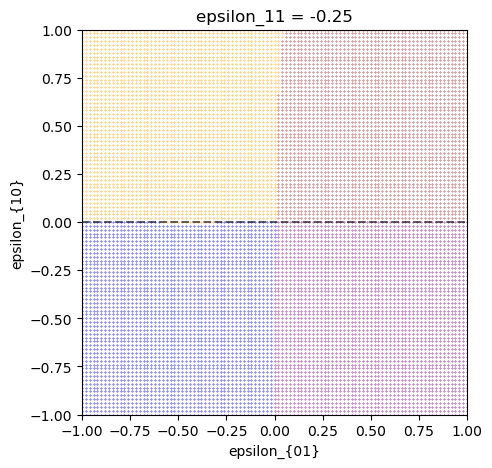

In [86]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot([-1, 1], [0, 0], linestyle="dashed", alpha=0.6, color="black")
for topo_category in range(0, 8): 
    idxs = np.where(colors==topo_category)
    ax.scatter(x[idxs], y[idxs], color=color_range[topo_category], alpha=1, s=0.1)
ax.set_aspect(1)
ax.set_title(f"epsilon_{11} = {z}")
ax.set_xlabel("epsilon_{01}")
ax.set_ylabel("epsilon_{10}");
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1);
plt.savefig(f"./figures/Formula_Plot_Slice_z={z}.pdf")
